In [1279]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from torch.utils.data import DataLoader
from thermography_dataset_one_layer import ThermDataset
from sklearn.model_selection import train_test_split
%matplotlib inline

In [1280]:
args = {'lr':0.01,
        'epochs':10000,
        'noise':0,
        'train size':0.7,
        'spec scale':10**12
        }

num_layers = 11

In [1281]:
def df_to_tensor(df):
    return torch.tensor(df.values, dtype=torch.float32)

# Preparing Data

In [1282]:
df = pd.read_excel('wide_range.xlsx')

In [1283]:
X = df.iloc[:,11:]
y = df.iloc[:,:11]

X = X.apply(lambda x: x*args['spec scale'])


X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=args['train size'], random_state=101)


X_train.index = range(len(X_train))
X_test.index = range(len(X_test))

In [1284]:
X_train

0.000004  0.000004  0.000004  0.000004  0.000004  0.000004  0.000004  \
0     0.047328  0.044030  0.062621  0.050627  0.071193  0.068130  0.101914   
1     0.038770  0.035673  0.050047  0.040308  0.056641  0.054457  0.082382   
2     0.017471  0.015108  0.019534  0.015249  0.021160  0.020663  0.033139   
3     0.024575  0.020517  0.025340  0.019283  0.026321  0.025631  0.041952   
4     0.012262  0.010760  0.014171  0.011194  0.015674  0.015384  0.024641   
...        ...       ...       ...       ...       ...       ...       ...   
1535  0.008816  0.007552  0.009605  0.007467  0.010369  0.010237  0.016819   
1536  0.022660  0.019827  0.026071  0.020487  0.028498  0.027720  0.043868   
1537  0.054368  0.049658  0.069249  0.055489  0.077627  0.074266  0.111904   
1538  0.017072  0.014896  0.019520  0.015351  0.021409  0.020917  0.033378   
1539  0.021359  0.019676  0.027645  0.022377  0.031646  0.030620  0.046760   

      0.000004  0.000004  0.000004  ...  0.000008  0.000008  0.000008  \
0     0.075729  0.108325  0.133987  ...  3.652357  3.706860  3.754378   
1     0.062676  0.091149  0.114388  ...  2.320425  2.355479  2.389728   
2     0.028438  0.044417  0.059315  ...  1.783106  1.818651  1.850644   
3     0.037789  0.060454  0.082459  ...  4.617065  4.680924  4.734778   
4     0.020957  0.032692  0.043657  ...  1.639148  1.670154  1.699314   
...        ...       ...       ...  ...       ...       ...       ...   
1535  0.015040  0.024138  0.032982  ...  1.737692  1.768599  1.798230   
1536  0.036680  0.056381  0.074280  ...  1.875067  1.911222  1.943955   
1537  0.084833  0.122915  0.153867  ...  5.344826  5.409761  5.465227   
1538  0.028303  0.043981  0.058593  ...  2.570995  2.615463  2.655006   
1539  0.036060  0.052949  0.067222  ...  3.392286  3.448372  3.495906   

      0.000008  0.000008  0.000008  0.000008  0.000008  0.000008  0.000008  
0     3.791491  3.816109  3.819172  3.783524  3.692427  3.557224  3.432674  
1     2.419447  2.441954  2.450765  2.434611  2.382484  2.301435  2.226764  
2     1.877459  1.898089  1.907974  1.898374  1.860607  1.800060  1.744286  
3     4.774832  4.798921  4.795918  4.744459  4.623791  4.448374  4.286812  
4     1.724537  1.744379  1.754398  1.746490  1.712636  1.657755  1.607205  
...        ...       ...       ...       ...       ...       ...       ...  
1535  1.824086  1.844388  1.854326  1.845326  1.808934  1.750374  1.696432  
1536  1.971422  1.992454  2.002216  1.991539  1.951336  1.887281  1.828272  
1537  5.505966  5.528740  5.520424  5.456460  5.313137  5.107256  4.917666  
1538  2.687193  2.710532  2.718533  2.698864  2.639391  2.547993  2.463787  
1539  3.532569  3.557166  3.561590  3.529876  3.446362  3.321571  3.206608  

[1540 rows x 86 columns]

In [1285]:
y_train

layer 1     layer 2     layer 3     layer 4     layer 5     layer 6  \
805   370.341309  328.561339  326.246196  325.960978  337.115108  338.011684   
1798  358.717780  321.142036  335.121747  323.227587  334.855686  331.980768   
193   303.578596  296.012106  320.139477  331.612634  343.149874  341.599287   
162   281.108362  326.802138  327.622403  330.956774  328.315642  325.316098   
1211  300.756094  302.244654  302.319500  307.933527  316.877701  315.324771   
...          ...         ...         ...         ...         ...         ...   
599   274.142753  312.028924  305.203144  306.792005  301.311853  291.127893   
1599  318.512434  351.712729  343.852709  337.011663  325.408620  325.728092   
1361  370.224132  340.547318  330.792273  325.245505  318.753576  321.749459   
1547  308.722907  320.029113  305.872919  303.670763  308.517581  320.283005   
863   338.422663  306.055939  297.007469  294.145054  307.124023  320.066599   

         layer 7     layer 8     layer 9   layer 10     layer 11  
805   329.244973  338.854172  334.003205  331.473263  344.660386  
1798  331.899256  332.369302  336.197365  344.170862  318.387290  
193   327.050020  312.050438  300.909822  290.052707  305.241303  
162   330.881045  323.297827  335.718231  335.832163  359.882238  
1211  318.254083  318.875332  313.324653  307.896394  301.072836  
...          ...         ...         ...         ...         ...  
599   298.271076  303.973224  308.318167  319.322458  303.811769  
1599  318.063111  309.798561  314.474813  297.388722  307.688462  
1361  328.052407  338.216759  343.711867  361.540581  369.965830  
1547  326.395634  328.204725  333.495631  311.017505  324.166657  
863   321.902875  319.890125  323.116906  302.077218  340.244495  

[1540 rows x 11 columns]

# Creating Models

In [1286]:
class Net(nn.Module):
    def __init__(self, input_size, output_size):
        super(Net, self).__init__()
        self.lin1 = nn.Linear(input_size, 45)
        self.lin2 = nn.Linear(45, 60)
        self.lin3 = nn.Linear(60, 75)
        self.lin4 = nn.Linear(75, 60)
        self.lin_fin = nn.Linear(60, output_size)


    def forward(self, x):
        x = F.leaky_relu(self.lin1(x))
        x = F.leaky_relu(self.lin2(x))
        x = F.leaky_relu(self.lin3(x))
        x = F.leaky_relu(self.lin4(x))
        x = self.lin_fin(x)
        return x

In [1287]:
input_size = len(X_train.columns)
output_size = 1

print(f' input size: {input_size}, output size: {output_size}')

models = {}
for i in range(1, 12):
    models[f'model{i}'] = Net(input_size + (-i+11), output_size)

print(models)

 input size: 86, output size: 1
{'model1': Net(
  (lin1): Linear(in_features=96, out_features=45, bias=True)
  (lin2): Linear(in_features=45, out_features=60, bias=True)
  (lin3): Linear(in_features=60, out_features=75, bias=True)
  (lin4): Linear(in_features=75, out_features=60, bias=True)
  (lin_fin): Linear(in_features=60, out_features=1, bias=True)
), 'model2': Net(
  (lin1): Linear(in_features=95, out_features=45, bias=True)
  (lin2): Linear(in_features=45, out_features=60, bias=True)
  (lin3): Linear(in_features=60, out_features=75, bias=True)
  (lin4): Linear(in_features=75, out_features=60, bias=True)
  (lin_fin): Linear(in_features=60, out_features=1, bias=True)
), 'model3': Net(
  (lin1): Linear(in_features=94, out_features=45, bias=True)
  (lin2): Linear(in_features=45, out_features=60, bias=True)
  (lin3): Linear(in_features=60, out_features=75, bias=True)
  (lin4): Linear(in_features=75, out_features=60, bias=True)
  (lin_fin): Linear(in_features=60, out_features=1, bias=T

# Training

In [1288]:
learning_rate = args['lr']
criterion = nn.L1Loss()
num_epochs = args['epochs']

In [1289]:
loss_lists = {}
prev_pred = None
inputs = df_to_tensor(X_train)
best_losses = []


for i in range(num_layers):
    best_loss = np.inf

    layer = 11 - i
    print(f'Layer {layer}')

    # define loss lists dictionary
    loss_lists[f'loss_list{layer}'] = []

    # define the model corresponding to the given layer
    model = models[f'model{layer}']

    # define optimizer corresponding to the given model
    optimizer = torch.optim.Adam(models[f'model{layer}'].parameters(), lr=learning_rate)

    # add previous predictions to inputs if necessary
    if i > 0:
        prev_pred = pred_temp.clone().detach().reshape(-1, 1)
        inputs = torch.cat([inputs, prev_pred], dim=1)
    
    # print(f'inputs: {inputs}')
    # print(f'inputs shape: {inputs.shape}')
    # # print(f'model input shape: {model}')

    # get expected_temp appropriately
    expected_temp = df_to_tensor(y_train.iloc[:,layer-1]).reshape(-1,1)
    print(f'expected_temp: {expected_temp}')

    # begin training loop
    for epoch in range(num_epochs):
        # empty gradients
        optimizer.zero_grad()

        # forward pass
        pred_temp = model(inputs)

        # calculate loss and add to loss list
        loss = criterion(pred_temp, expected_temp)
        loss_lists[f'loss_list{layer}'].append(loss.item())

        # backward pass
        loss.backward()
        
        # update
        optimizer.step()

        # print losses
        if (epoch+1) % int(args['epochs']/10) == 0:
            print(f'epoch: {epoch+1}, loss = {loss}')


        # best losses
        if loss < best_loss:
            best_loss = loss
            best_epoch = epoch + 1

    best_losses.append(best_loss.item())

    # print(f" loss_list{layer}: {loss_lists[f'loss_list{layer}']}")
    # print(f'pred_temp_new: {pred_temp_new}')



Layer 11
epoch: 100, loss = 23.388641357421875
epoch: 200, loss = 8.105280876159668
epoch: 300, loss = 49.11825180053711
epoch: 400, loss = 13.370187759399414
epoch: 500, loss = 14.318351745605469
epoch: 600, loss = 20.307388305664062
epoch: 700, loss = 3.279113292694092
epoch: 800, loss = 6.453996181488037
epoch: 900, loss = 5.991266250610352
epoch: 1000, loss = 6.015111923217773
Layer 10
epoch: 100, loss = 12.096328735351562
epoch: 200, loss = 18.739025115966797
epoch: 300, loss = 11.788287162780762
epoch: 400, loss = 9.782097816467285
epoch: 500, loss = 9.315759658813477
epoch: 600, loss = 8.686689376831055
epoch: 700, loss = 8.369309425354004
epoch: 800, loss = 8.127769470214844
epoch: 900, loss = 8.108846664428711
epoch: 1000, loss = 7.855527877807617
Layer 9
epoch: 100, loss = 6.949618339538574
epoch: 200, loss = 8.629813194274902
epoch: 300, loss = 5.183599948883057
epoch: 400, loss = 9.961074829101562
epoch: 500, loss = 8.35092544555664
epoch: 600, loss = 4.898857593536377
epoc

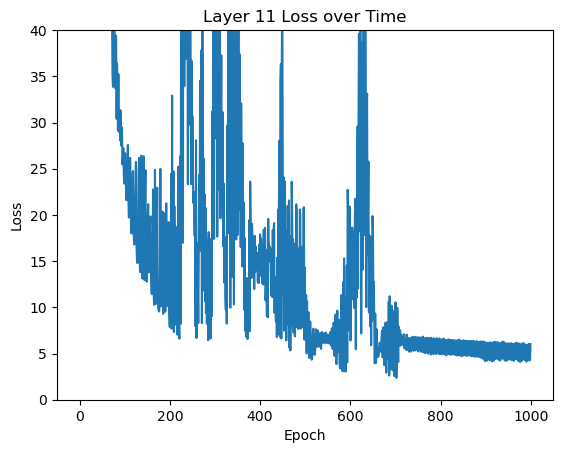

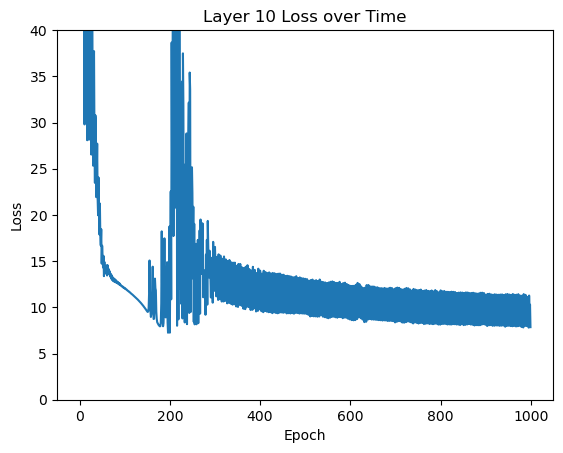

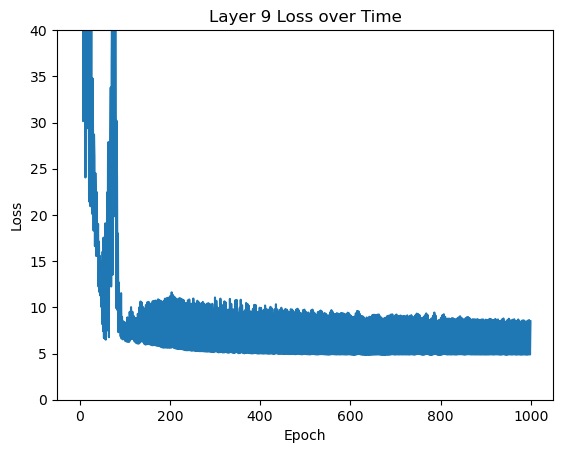

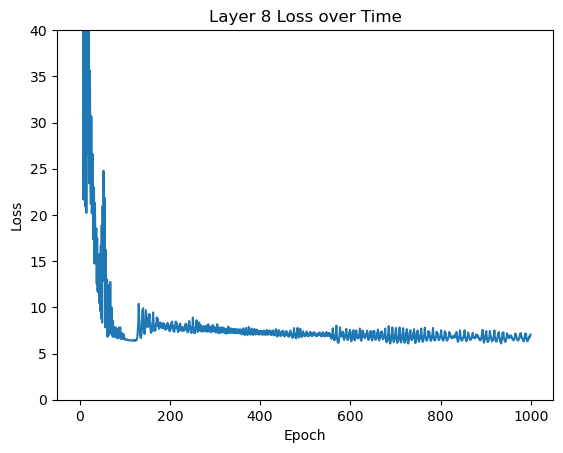

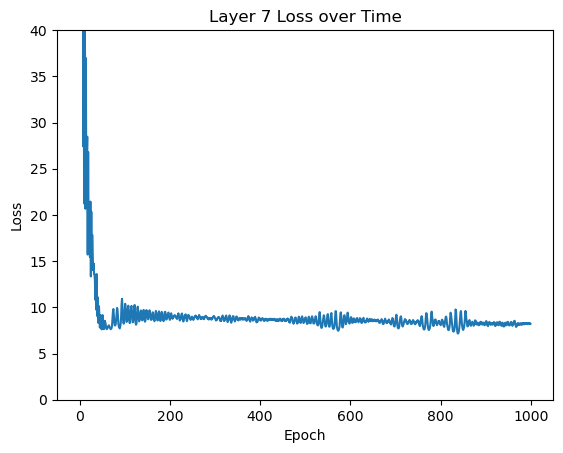

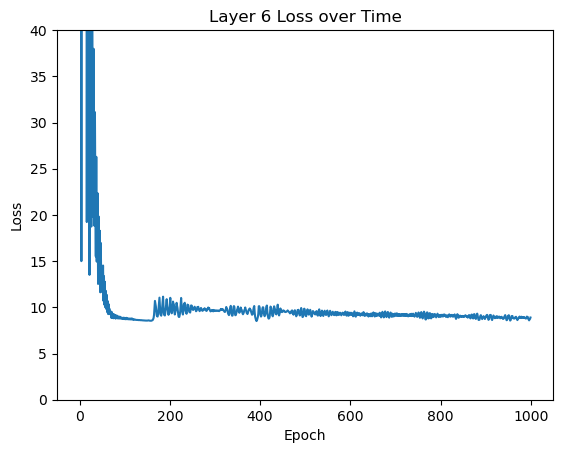

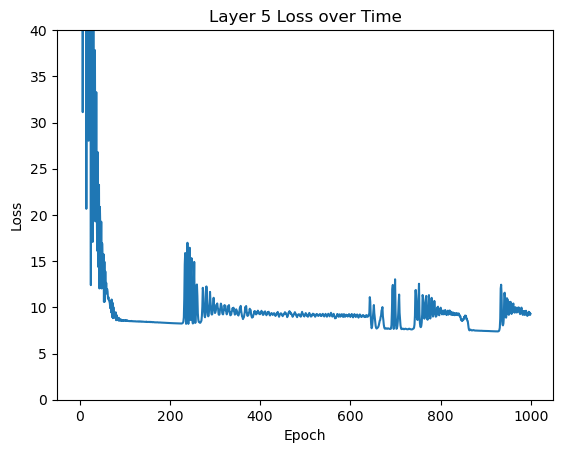

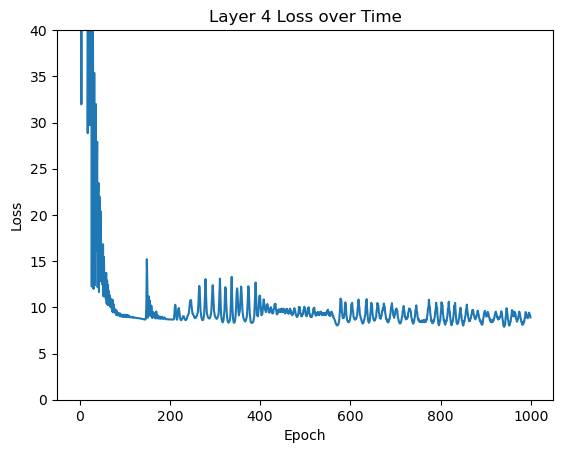

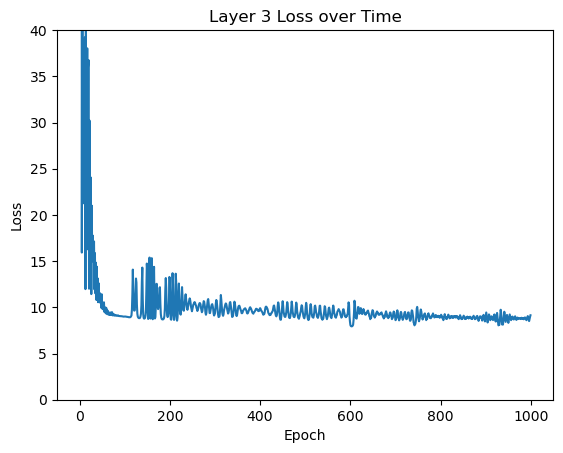

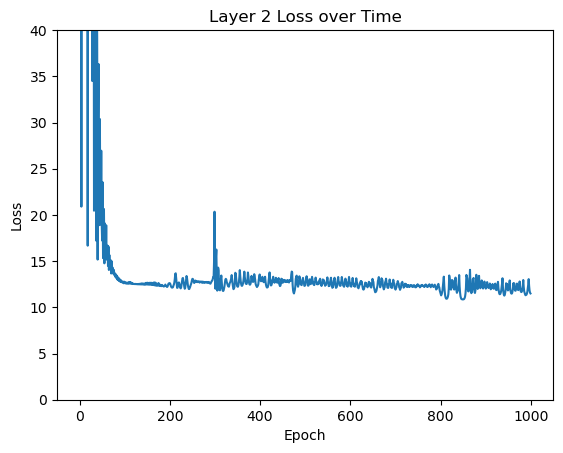

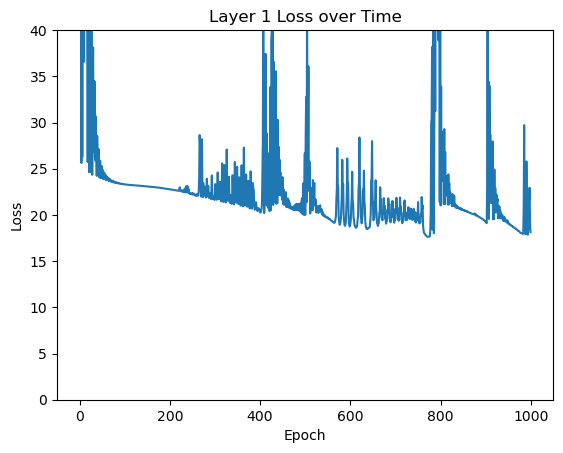

In [1290]:
for i in range(num_layers):
    layer = 11 - i
    plt.plot(loss_lists[f'loss_list{layer}'])
    
    plt.title(f'Layer {layer} Loss over Time')
    plt.xlabel("Epoch")
    plt.ylabel("Loss")

    plt.ylim(0, 40)

    plt.show()

[17.633058547973633, 10.857087135314941, 7.939284324645996, 7.890442848205566, 7.387337684631348, 8.51669692993164, 7.159785270690918, 6.070530414581299, 4.837329387664795, 7.248155117034912, 2.3757312297821045]


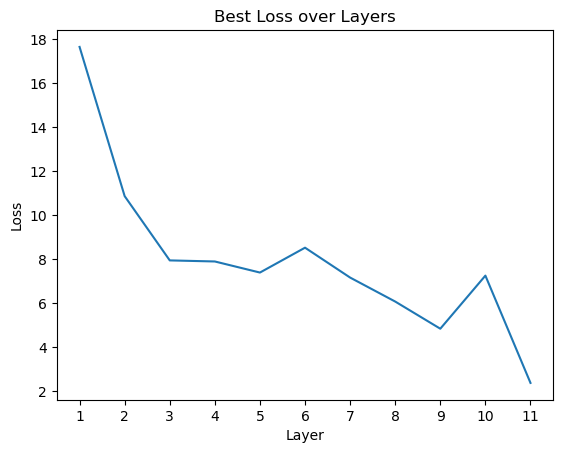

In [1291]:
best_losses.reverse()
print(best_losses)
plt.plot(range(1, len(best_losses) + 1), best_losses)

plt.title("Best Loss over Layers")
plt.xlabel("Layer")
plt.ylabel("Loss")

plt.xticks(range(1, 12))

plt.show()

In [1292]:
X_test

0.000004  0.000004  0.000004  0.000004  0.000004  0.000004  0.000004  \
0    0.018515  0.015976  0.020600  0.016055  0.022256  0.021749  0.034964   
1    0.043772  0.041262  0.059537  0.048403  0.068239  0.065240  0.096873   
2    0.017829  0.015513  0.020275  0.015916  0.022175  0.021644  0.034542   
3    0.028874  0.026882  0.038215  0.031001  0.043788  0.042199  0.063727   
4    0.013053  0.011086  0.013989  0.010803  0.014916  0.014645  0.023965   
..        ...       ...       ...       ...       ...       ...       ...   
655  0.040708  0.036523  0.049741  0.039575  0.055274  0.053263  0.081873   
656  0.027375  0.022933  0.028530  0.021784  0.029798  0.028944  0.047045   
657  0.015737  0.013811  0.018207  0.014363  0.020070  0.019632  0.031266   
658  0.019968  0.016800  0.020938  0.016027  0.021967  0.021467  0.035106   
659  0.027414  0.025285  0.035565  0.028739  0.040527  0.039122  0.059494   

     0.000004  0.000004  0.000004  ...  0.000008  0.000008  0.000008  \
0    0.030125  0.047227  0.063182  ...  1.451875  1.477768  1.503532   
1    0.070617  0.099667  0.121568  ...  0.907810  0.926176  0.944894   
2    0.029303  0.045591  0.060768  ...  3.410735  3.462837  3.508609   
3    0.048035  0.069528  0.086861  ...  1.902919  1.933518  1.963843   
4    0.021373  0.034203  0.046631  ...  2.719363  2.762065  2.801345   
..        ...       ...       ...  ...       ...       ...       ...   
655  0.064688  0.096183  0.123254  ...  3.865269  3.921959  3.970999   
656  0.041821  0.066409  0.090098  ...  5.462684  5.534966  5.593891   
657  0.026356  0.040881  0.054282  ...  1.381532  1.405927  1.430591   
658  0.031445  0.050302  0.068496  ...  3.326726  3.374331  3.417822   
659  0.045537  0.066542  0.083849  ...  1.741233  1.771039  1.800190   

     0.000008  0.000008  0.000008  0.000008  0.000008  0.000008  0.000008  
0    1.526685  1.545397  1.555462  1.549624  1.520720  1.473075  1.429196  
1    0.962233  0.976891  0.986120  0.985245  0.969615  0.941869  0.916342  
2    3.544771  3.569294  3.573653  3.541757  3.457889  3.332613  3.217203  
3    1.990680  2.011676  2.021404  2.010505  1.969802  1.905030  1.845360  
4    2.833894  2.857479  2.864959  2.843300  2.779745  2.682631  2.593159  
..        ...       ...       ...       ...       ...       ...       ...  
655  4.008885  4.033508  4.035349  3.996318  3.898784  3.754776  3.622120  
656  5.635647  5.658266  5.648952  5.582709  5.435310  5.223976  5.029370  
657  1.452994  1.471254  1.481297  1.476190  1.449096  1.404116  1.362693  
658  3.453128  3.477518  3.482328  3.451803  3.370601  3.248996  3.136967  
659  1.825913  1.846202  1.856137  1.847117  1.810678  1.752052  1.698047  

[660 rows x 86 columns]

In [1307]:
import matplotlib.pyplot as plt


def plot_actual_vs_pred(pred, actual, total_epochs):
    chunk_size = total_epochs // 10  # Number of sublists per chunk

    # Iterate over sublists in chunks of size 100
    for i in range(0, len(pred), chunk_size):
        # Create a new figure for each chunk
        plt.figure()
        
        plt.plot(pred[i], label='Predicted')
        plt.plot(actual[i], label='Actual')

        # Set title and labels for the plot
        plt.title("Temperature: Predicted vs Actual")
        plt.xlabel("Silica Layer")
        plt.ylabel("Temperature (K)")
        
        # Display the plot
        plt.show()

In [1308]:
inputs = df_to_tensor(X_test)

inputs

tensor([[0.0185, 0.0160, 0.0206,  ..., 1.5207, 1.4731, 1.4292],
        [0.0438, 0.0413, 0.0595,  ..., 0.9696, 0.9419, 0.9163],
        [0.0178, 0.0155, 0.0203,  ..., 3.4579, 3.3326, 3.2172],
        ...,
        [0.0157, 0.0138, 0.0182,  ..., 1.4491, 1.4041, 1.3627],
        [0.0200, 0.0168, 0.0209,  ..., 3.3706, 3.2490, 3.1370],
        [0.0274, 0.0253, 0.0356,  ..., 1.8107, 1.7521, 1.6980]])

Layer 11
Net(
  (lin1): Linear(in_features=86, out_features=45, bias=True)
  (lin2): Linear(in_features=45, out_features=60, bias=True)
  (lin3): Linear(in_features=60, out_features=75, bias=True)
  (lin4): Linear(in_features=75, out_features=60, bias=True)
  (lin_fin): Linear(in_features=60, out_features=1, bias=True)
)
sample_predictions: [298.57550048828125]
Layer 10
Net(
  (lin1): Linear(in_features=87, out_features=45, bias=True)
  (lin2): Linear(in_features=45, out_features=60, bias=True)
  (lin3): Linear(in_features=60, out_features=75, bias=True)
  (lin4): Linear(in_features=75, out_features=60, bias=True)
  (lin_fin): Linear(in_features=60, out_features=1, bias=True)
)
sample_predictions: [298.57550048828125, 315.48065185546875]
Layer 9
Net(
  (lin1): Linear(in_features=88, out_features=45, bias=True)
  (lin2): Linear(in_features=45, out_features=60, bias=True)
  (lin3): Linear(in_features=60, out_features=75, bias=True)
  (lin4): Linear(in_features=75, out_features=60, bias=T

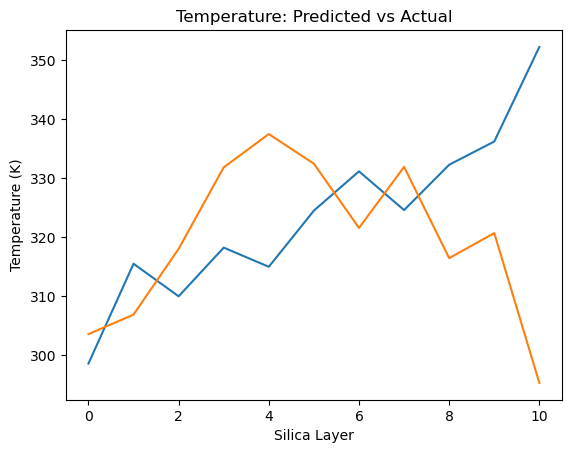

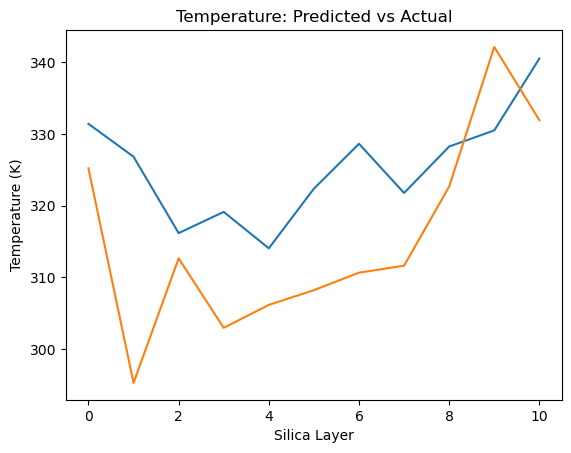

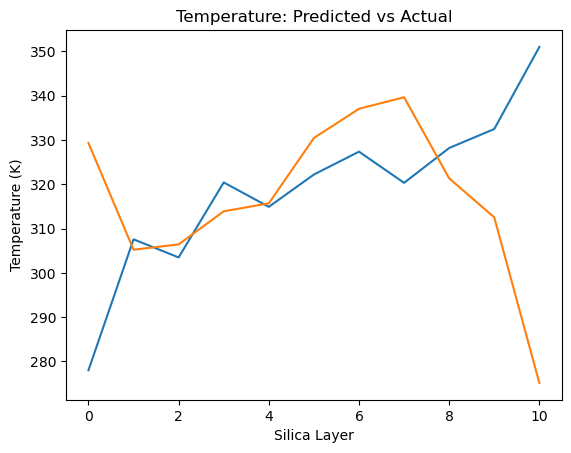

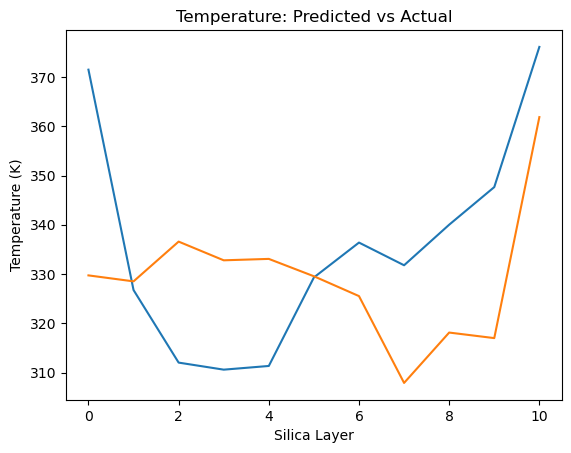

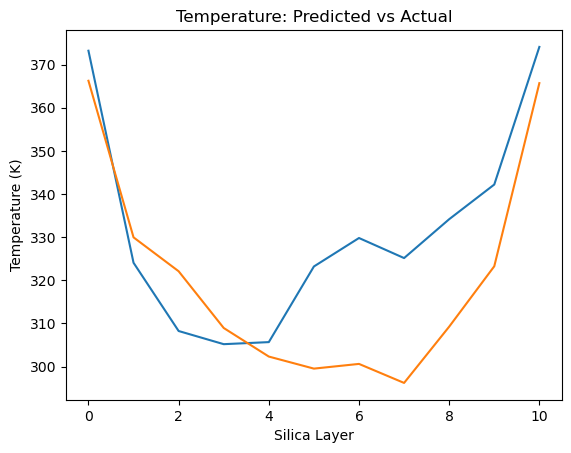

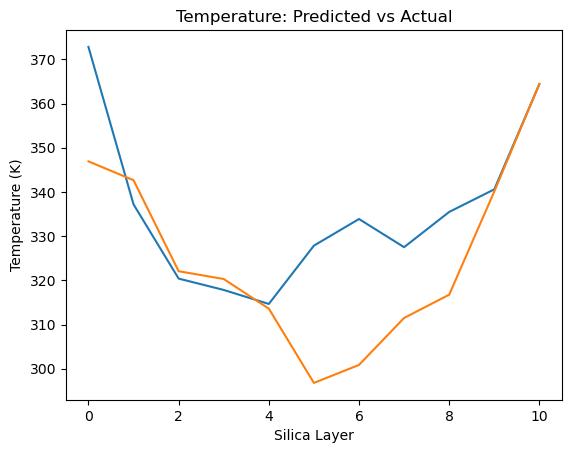

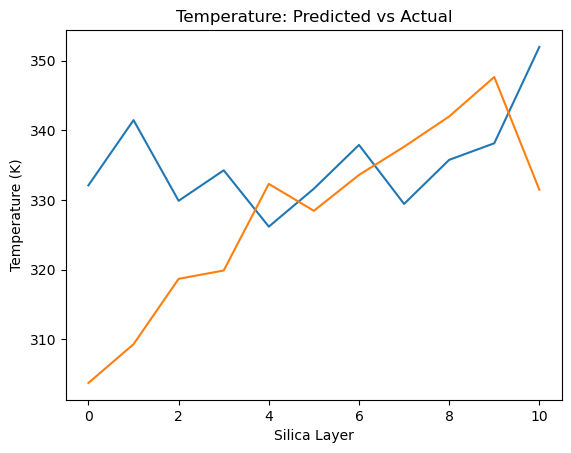

In [1309]:
inputs = df_to_tensor(X_test)
predictions = []

with torch.no_grad():
    for sample in inputs:
        sample_prediction = []
        for i in range(num_layers):
            layer = 11 - i
            print(f'Layer {layer}')

            if i > 0:
                layer_pred_reshaped = layer_pred.reshape(1, -1)
                sample_reshaped = sample.reshape(1,-1)
                # print(f'layer_pred shape: {layer_pred_reshaped.shape}')
                # print(f'sample shape: {sample.shape}')
                sample = torch.cat([sample_reshaped, layer_pred_reshaped], dim = 1)

            # define the model corresponding to the given layer
            model = models[f'model{layer}']
            print(model)

            layer_pred = model(sample)
            sample_prediction.append(layer_pred.item())
            print(f'sample_predictions: {sample_prediction}')
        
        predictions.append(sample_prediction)

actual = df_to_tensor(y_test).tolist()
plot_actual_vs_pred(predictions, actual, num_epochs)

        # # define layer's pred_list in predictions dictionary
        # predictions[f'pred_list{layer}'] = []

        # # define the model corresponding to the given layer
        # model = models[f'model{layer}']

        # # add previous predictions to inputs if necessary
        # if i > 0:
        #     prev_pred = predictions[f'pred_temp{layer + 1}'].clone().detach().reshape(-1, 1)
        #     inputs = torch.cat([inputs, prev_pred], dim=1)

        # # get expected_temp appropriately
        # actual_temp = df_to_tensor(y_test.iloc[:,layer-1]).reshape(-1,1)

        # # get predictions for appropriate layer
        # predictions[f'pred_temp{layer}'] = model(inputs)

        # print(predictions[f'pred_temp{layer}'].numpy())

        # plot_actual_vs_pred(predictions[f'pred_temp{layer}'].numpy(), actual_temp.numpy(), 0) 
